In [142]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the .npy files
file = "n43"

time = np.load(f'../save_data/eulerian/plots/{file}/epochs.npy')
u_error = np.load(f'../save_data/eulerian/plots/{file}/rbErrors.npy')
w_error = np.load(f'../save_data/eulerian/plots/{file}/wbErrors.npy')

# time_l = np.load(f'lagrangian/plots/{file}/epochs.npy')
# u_error_l = np.load(f'lagrangian/plots/{file}/rbErrors.npy')
# w_error_l = np.load(f'lagrangian/plots/{file}/wbErrors.npy')
# u_error_l = np.nan_to_num(u_error_l, nan=10e130, posinf=10e130)
# w_error_l = np.nan_to_num(w_error_l, nan=10e130, posinf=10e130)

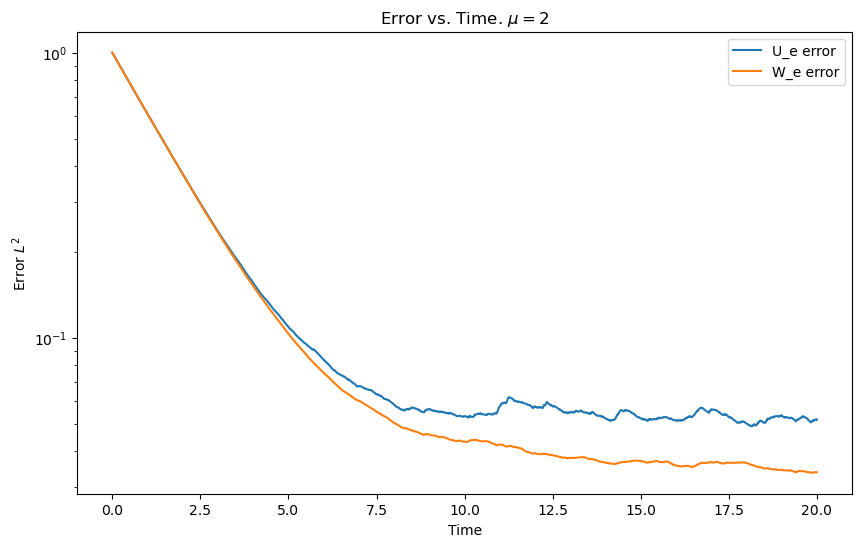

In [143]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U_e error')
plt.semilogy(time, w_error, label='W_e error')
plt.xlabel('Time')
plt.ylabel('Error $L^2$')
plt.title(r'Error vs. Time. $\mu=2$')
plt.legend()
# plt.grid(True)
plt.show()

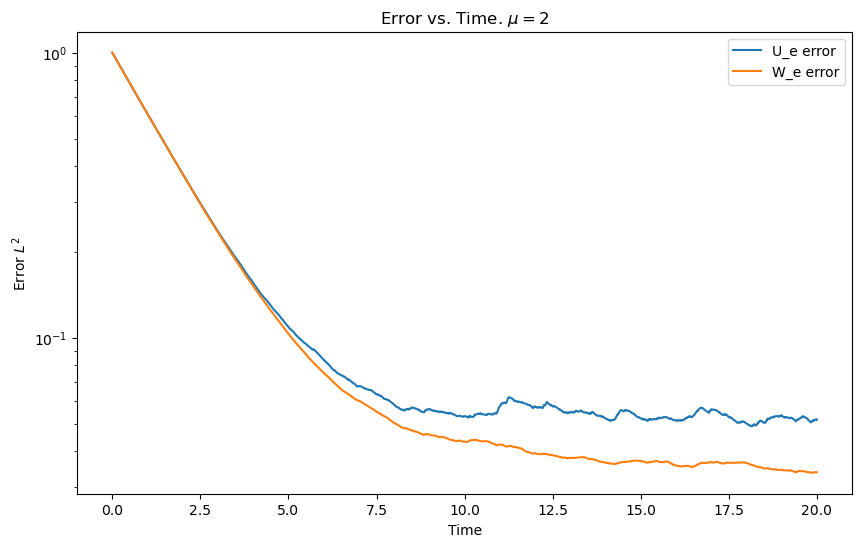

In [144]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(time, u_error, label='U_e error')
plt.semilogy(time, w_error, label='W_e error')
plt.xlabel('Time')
plt.ylabel('Error $L^2$')
plt.title(r'Error vs. Time. $\mu=2$')
plt.legend()
# plt.grid(True)
plt.show()

0.044850279178335596


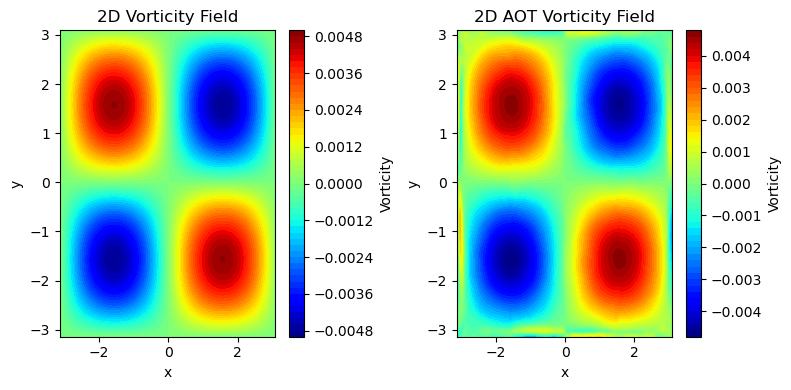

In [145]:
import h5py
f = h5py.File('snapshots_s2.h5','r')
x = f['/scales/x/1.0'][:]
z = f['/scales/z/1.0'][:]
t = f['scales']['sim_time'][:]
u_ = f['tasks']['u_'][:]
w_ = f['tasks']['w_'][:]
u = f['tasks']['u'][:]
w = f['tasks']['w'][:]
f.close()

time_idx = 29
u_ = u_[time_idx, :, :] # remove length-one x dimension
w_ = w_[time_idx, :, :] # remove length-one x dimension
u = u[time_idx, :, :] # remove length-one x dimension
w = w[time_idx, :, :] # remove length-one x dimension
plt.figure(figsize=(8, 4))
# for i in range(0,21,5):
X, Z = np.meshgrid(x, z)

# Compute partial derivatives
dw_dx, dw_dy = np.gradient(w)
du_dx, du_dy = np.gradient(u)
# Compute vorticity
vorticity = dw_dx - du_dy

# Compute partial derivatives
dw_dx, dw_dy = np.gradient(w_)
du_dx, du_dy = np.gradient(u_)
# Compute vorticity
vorticity_hat = dw_dx - du_dy
print(np.linalg.norm(vorticity_hat-vorticity))
plt.subplot(1,2,1)
plt.contourf(X, Z, vorticity, levels=50, cmap='jet')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Vorticity")
plt.title("2D Vorticity Field")
# plt.quiver(X, Z, u, w, color='k', alpha=0.5)  # Overlay velocity vectors

plt.subplot(1,2,2)
plt.contourf(X, Z, vorticity_hat, levels=50, cmap='jet')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Vorticity")
plt.title("2D AOT Vorticity Field")
# plt.quiver(X, Z, u_, w_, color='k', alpha=0.5)  # Overlay velocity vectors

plt.tight_layout()  # Adjust spacing
plt.show()

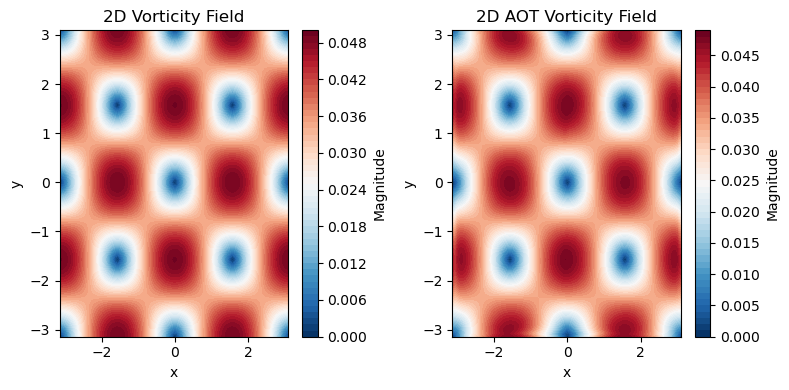

In [146]:
import h5py
f = h5py.File('snapshots_s2.h5','r')
x = f['/scales/x/1.0'][:]
z = f['/scales/z/1.0'][:]
t = f['scales']['sim_time'][:]
u_ = f['tasks']['u_'][:]
w_ = f['tasks']['w_'][:]
u = f['tasks']['u'][:]
w = f['tasks']['w'][:]
f.close()

time_idx = 29
u_ = u_[time_idx, :, :] # remove length-one x dimension
w_ = w_[time_idx, :, :] # remove length-one x dimension
u = u[time_idx, :, :] # remove length-one x dimension
w = w[time_idx, :, :] # remove length-one x dimension
plt.figure(figsize=(8, 4))
# for i in range(0,21,5):
X, Z = np.meshgrid(x, z)

plt.subplot(1,2,1)
plt.contourf(X, Z, np.sqrt(np.square(u)+np.square(w)), levels=50, cmap='RdBu_r')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Magnitude")
plt.title("2D Vorticity Field")
# plt.quiver(X, Z, u, w, color='k', alpha=0.5)  # Overlay velocity vectors

plt.subplot(1,2,2)
plt.contourf(X, Z, np.sqrt(np.square(u_)+np.square(w_)), levels=50, cmap='RdBu_r')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Magnitude")
plt.title("2D AOT Vorticity Field")
# plt.quiver(X, Z, u_, w_, color='k', alpha=0.5)  # Overlay velocity vectors

plt.tight_layout()  # Adjust spacing
plt.show()

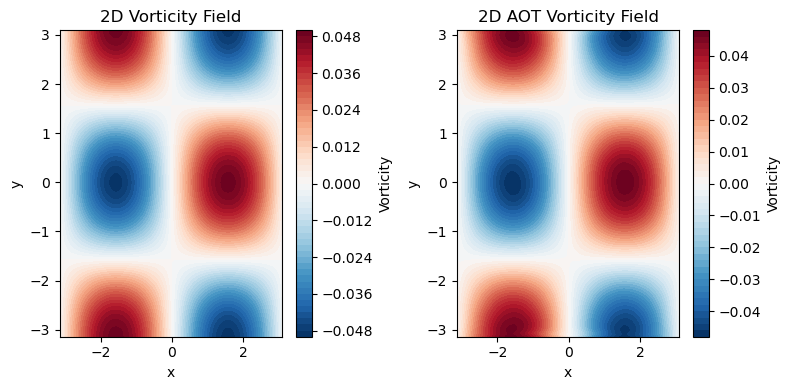

In [147]:
import h5py
f = h5py.File('snapshots_s2.h5','r')
x = f['/scales/x/1.0'][:]
z = f['/scales/z/1.0'][:]
t = f['scales']['sim_time'][:]
u_ = f['tasks']['u_'][:]
w_ = f['tasks']['w_'][:]
u = f['tasks']['u'][:]
w = f['tasks']['w'][:]
f.close()

time_idx = 29
u_ = u_[time_idx, :, :] # remove length-one x dimension
w_ = w_[time_idx, :, :] # remove length-one x dimension
u = u[time_idx, :, :] # remove length-one x dimension
w = w[time_idx, :, :] # remove length-one x dimension
plt.figure(figsize=(8, 4))
# for i in range(0,21,5):
X, Z = np.meshgrid(x, z)

plt.subplot(1,2,1)
plt.contourf(X, Z, w, levels=50, cmap='RdBu_r')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Vorticity")
plt.title("2D Vorticity Field")
# plt.quiver(X, Z, u, w, color='k', alpha=0.5)  # Overlay velocity vectors

plt.subplot(1,2,2)
plt.contourf(X, Z, w_, levels=50, cmap='RdBu_r')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Vorticity")
plt.title("2D AOT Vorticity Field")
# plt.quiver(X, Z, u_, w_, color='k', alpha=0.5)  # Overlay velocity vectors

plt.tight_layout()  # Adjust spacing
plt.show()